### Student Information
Name: 丁浩文

Student ID: 109062517

GitHub ID: joshua049

In [1]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

---

---

In [2]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [3]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

In [4]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [5]:
# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))
X[0:10]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian  
5  soc.religion.christian  
6  soc.religion.christian  
7                 sci.med  
8                 sci.med  
9                 sci.med

### **>>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [6]:
#Answer here
X.loc[::10, 'text':'category'][0:10]

text  category
0   From: sd345@city.ac.uk (Michael Collier) Subje...         1
10  From: anasaz!karl@anasazi.com (Karl Dussik) Su...         3
20  From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...         3
30  From: vgwlu@dunsell.calgary.chevron.com (greg ...         2
40  From: david-s@hsr.no (David A. Sjoen) Subject:...         3
50  From: ab@nova.cc.purdue.edu (Allen B) Subject:...         1
60  From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ...         0
70  From: weaver@chdasic.sps.mot.com (Dave Weaver)...         3
80  From: annick@cortex.physiol.su.oz.au (Annick A...         2
90  Subject: Vonnegut/atheism From: dmn@kepler.unh...         0

---

In [7]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text             (The amoung of missing records is: , 0)
category         (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 0)
dtype: object

In [8]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])

In [9]:
result_with_series = X.append(dummy_series, ignore_index=True)

In [10]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

text             (The amoung of missing records is: , 0)
category         (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 1)
dtype: object

In [11]:
# dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record',
               'category': 1
              }]

In [12]:
X = X.append(dummy_dict, ignore_index=True)

In [13]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text             (The amoung of missing records is: , 0)
category         (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 1)
dtype: object

So now that we can see that our data has missing values, we want to remove the records with missing values. The code to drop the record with missing that we just added, is the following:

In [14]:
X.dropna(inplace=True)

In [15]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text             (The amoung of missing records is: , 0)
category         (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 0)
dtype: object

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [16]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [17]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

### Answer here
On rows 2, 3, 5 they were also missing values in 'missing_example', since they were string type (neither nan nor None), they won't be determined as missing values by isnull()

---

In [18]:
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        },
                        {
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        }]

In [19]:
X = X.append(dummy_duplicate_dict, ignore_index=True)

In [20]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [21]:
X

text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
...                                                 ...       ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

               category_name  
0              comp.graphics  
1              comp.graphics  
2     soc.religion.christian  
3     soc.religion.christian  
4     soc.religion.christian  
...                      ...  
2252                 sci.med  
2253                 sci.med  
2254                 sci.med  
2255                 sci.med  
2256                 sci.med  

[2257 rows x 3 columns]

In [22]:
X_sample = X.sample(n=1000) #random state

In [23]:
X

text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
...                                                 ...       ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

               category_name  
0              comp.graphics  
1              comp.graphics  
2     soc.religion.christian  
3     soc.religion.christian  
4     soc.religion.christian  
...                      ...  
2252                 sci.med  
2253                 sci.med  
2254                 sci.med  
2255                 sci.med  
2256                 sci.med  

[2257 rows x 3 columns]

### **>>> Exercise 6 (take home):**
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

### Answer here


---

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

In [25]:
X_sample.category_name.value_counts().to_numpy()
np.arange(len(X_sample.category_name))
X_sample.category_name

1441    soc.religion.christian
1550             comp.graphics
434                    sci.med
234                alt.atheism
792                alt.atheism
                 ...          
1748               alt.atheism
770                    sci.med
138     soc.religion.christian
374     soc.religion.christian
1505             comp.graphics
Name: category_name, Length: 1000, dtype: object

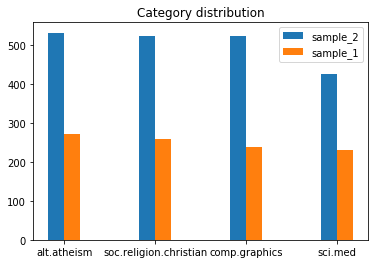

In [26]:
# Answer here
X_sample_2 = X.sample(n=2000)

ind = np.arange(len(X_sample.category_name.value_counts()))*2  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, X_sample_2.category_name.value_counts().to_numpy(), width,
                label='sample_2')
rects2 = ax.bar(ind + width/2, X_sample.category_name.value_counts().to_numpy(), width,
                label='sample_1')

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
ax.set_title('Category distribution')
ax.set_xticks(ind)
ax.set_xticklabels(categories)
ax.legend()

---

In [27]:
import nltk

In [28]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [29]:
X[0:4]["unigrams"]

0    [From, :, sd345, @, city.ac.uk, (, Michael, Co...
1    [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....
2    [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...
3    [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...
Name: unigrams, dtype: object

---

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [31]:
analyze = count_vect.build_analyzer()
analyze("Hello World!")
#" ".join(list(X[4:5].text))

['hello', 'world']

---

In [32]:
# Answer here
X['text'].apply(lambda x: analyze(x))

0       [from, sd345, city, ac, uk, michael, collier, ...
1       [from, ani, ms, uky, edu, aniruddha, deglurkar...
2       [from, djohnson, cs, ucsd, edu, darin, johnson...
3       [from, s0612596, let, rug, nl, zwart, subject,...
4       [from, stanly, grok11, columbiasc, ncr, com, s...
                              ...                        
2252    [from, roos, operoni, helsinki, fi, christophe...
2253    [from, mhollowa, ic, sunysb, edu, michael, hol...
2254    [from, sasghm, theseus, unx, sas, com, gary, m...
2255    [from, dan, wallach, dwallach, cs, berkeley, e...
2256    [from, dyer, spdcc, com, steve, dyer, subject,...
Name: text, Length: 2257, dtype: object

---

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [33]:
# Answer here
X_value, Y_value = np.nonzero(X_counts[4, :100])
count_vect.get_feature_names()[Y_value[1]]


'01'

---

In [34]:
count_vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [35]:
count_vect.transform(['00 Something completely new.']).toarray()

array([[1, 0, 0, ..., 0, 0, 0]])

Impressive, huh!

To get you started in thinking about how to better analyze your data or transformation, let us look at this nice little heat map of our term-document matrix. It may come as a surpise to see the gems you can mine when you start to look at the data from a different perspective. Visualization are good for this reason.

In [36]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

In [37]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [38]:
plot_z = X_counts[0:20, 0:20].toarray()

---

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [39]:
# Answer here
X_sample_plot = X.sample(n=100)
sample_count_vect = CountVectorizer()
X_sample_counts = sample_count_vect.fit_transform(X_sample_plot.text)

plot_x = ["term_"+str(i) for i in sample_count_vect.get_feature_names()[0:25]]
plot_y = ["doc_"+ str(i) for i in list(X_sample_plot.index)[0:25]]
plot_z = X_sample_counts[:25, :25].toarray()
plot_z.shape

(25, 25)

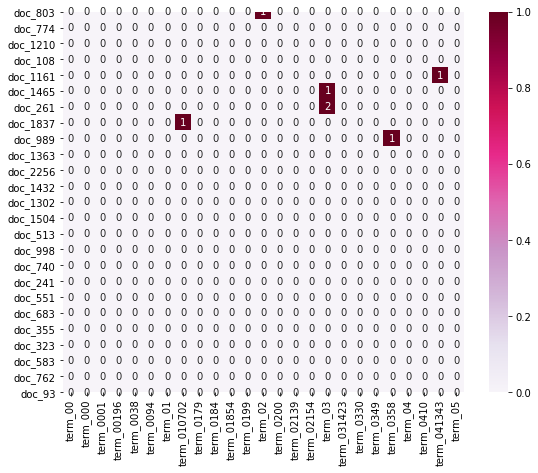

In [40]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
# plt.imshow(plot_z)

ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

---

In [41]:
from sklearn.decomposition import PCA

In [42]:
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

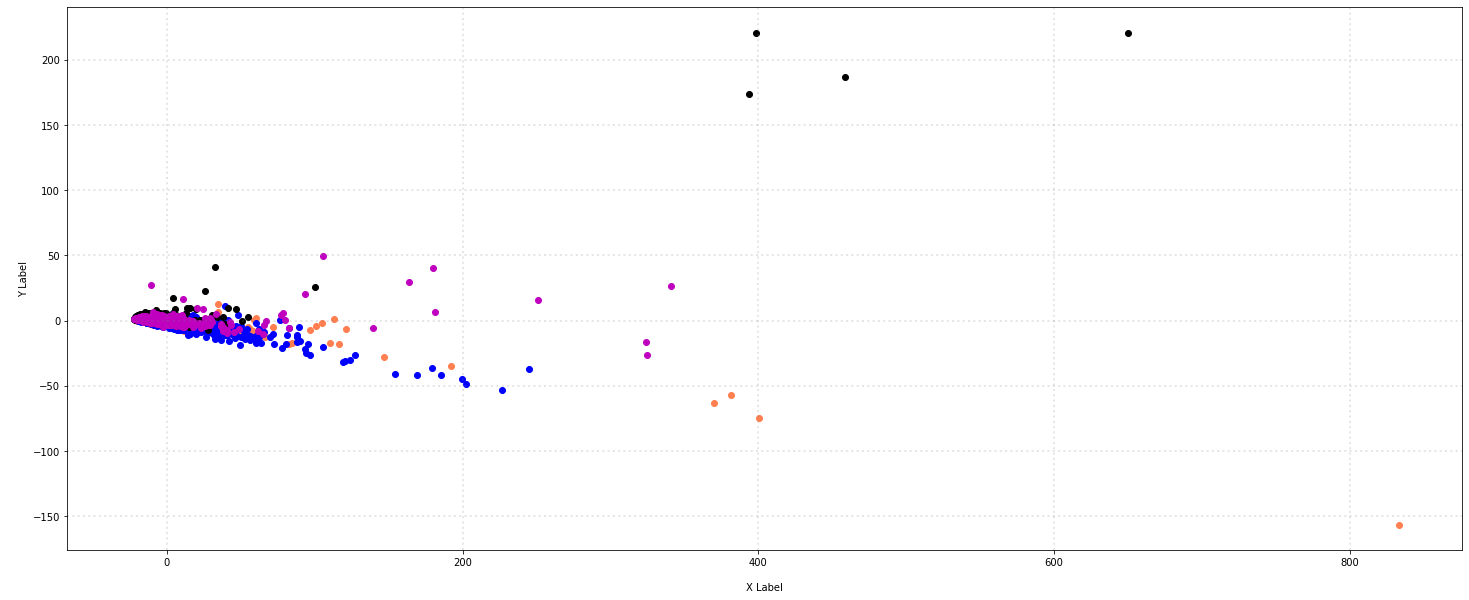

In [43]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

---

### >>> **Exercise 12 (take home):**
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [44]:
# Answer here
from mpl_toolkits.mplot3d import Axes3D

X_reduced_3 = PCA(n_components = 3).fit_transform(X_counts.toarray())
X_reduced_3.shape

(2257, 3)

Text(0.5, 0, 'PC 3')

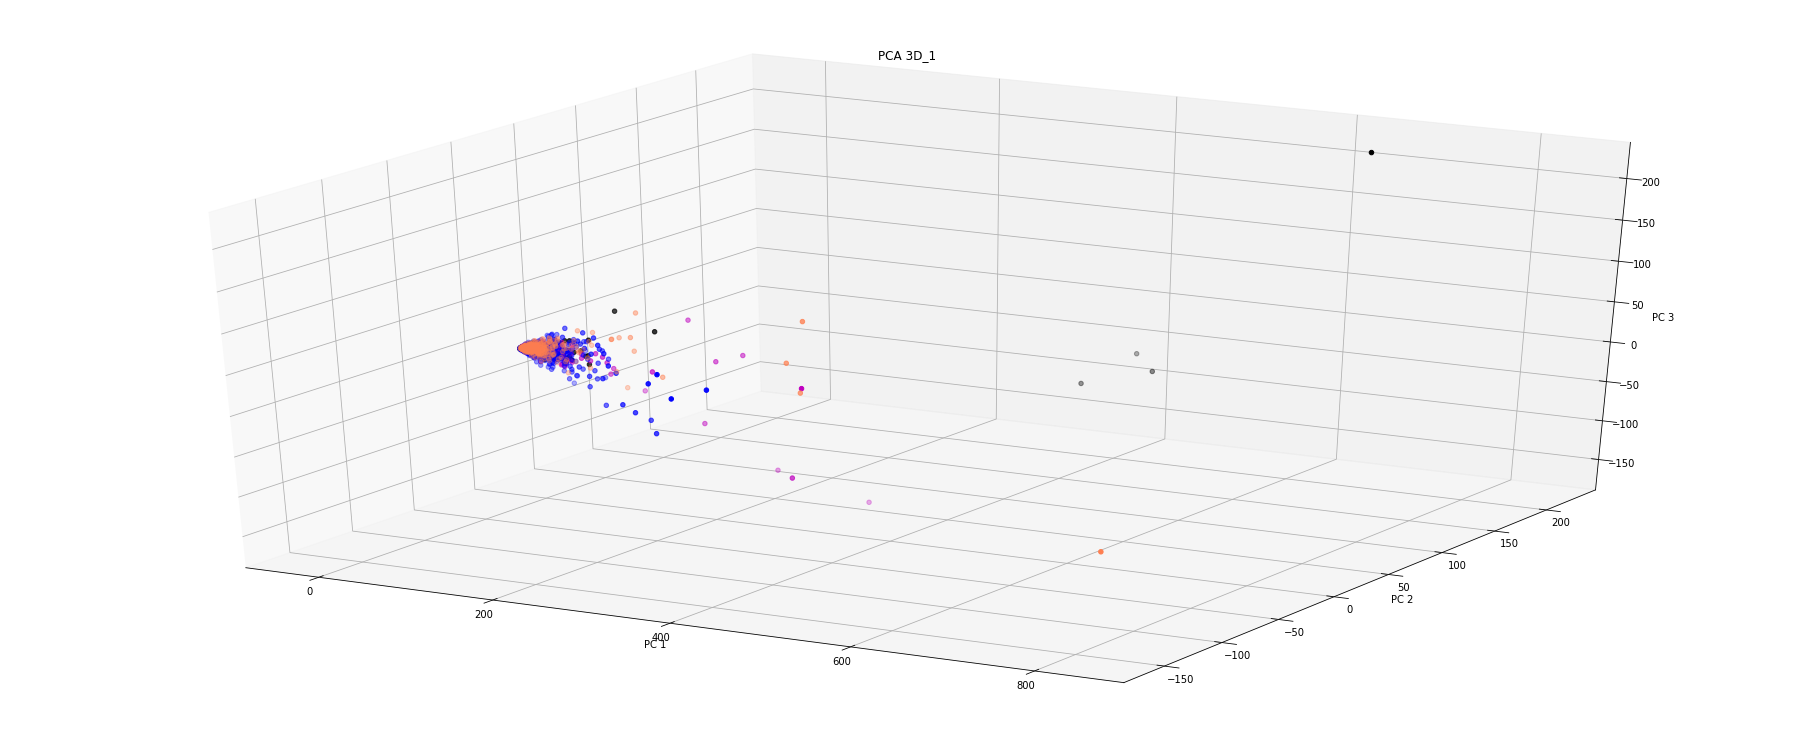

In [45]:
fig = plt.figure(figsize = (25,10))

ax = Axes3D(fig)

for c, category in zip(col, categories):
    xs = X_reduced_3[X['category_name'] == category].T[0]
    ys = X_reduced_3[X['category_name'] == category].T[1]
    zs = X_reduced_3[X['category_name'] == category].T[2]    
    
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

    
ax.set_title('PCA 3D_1')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')


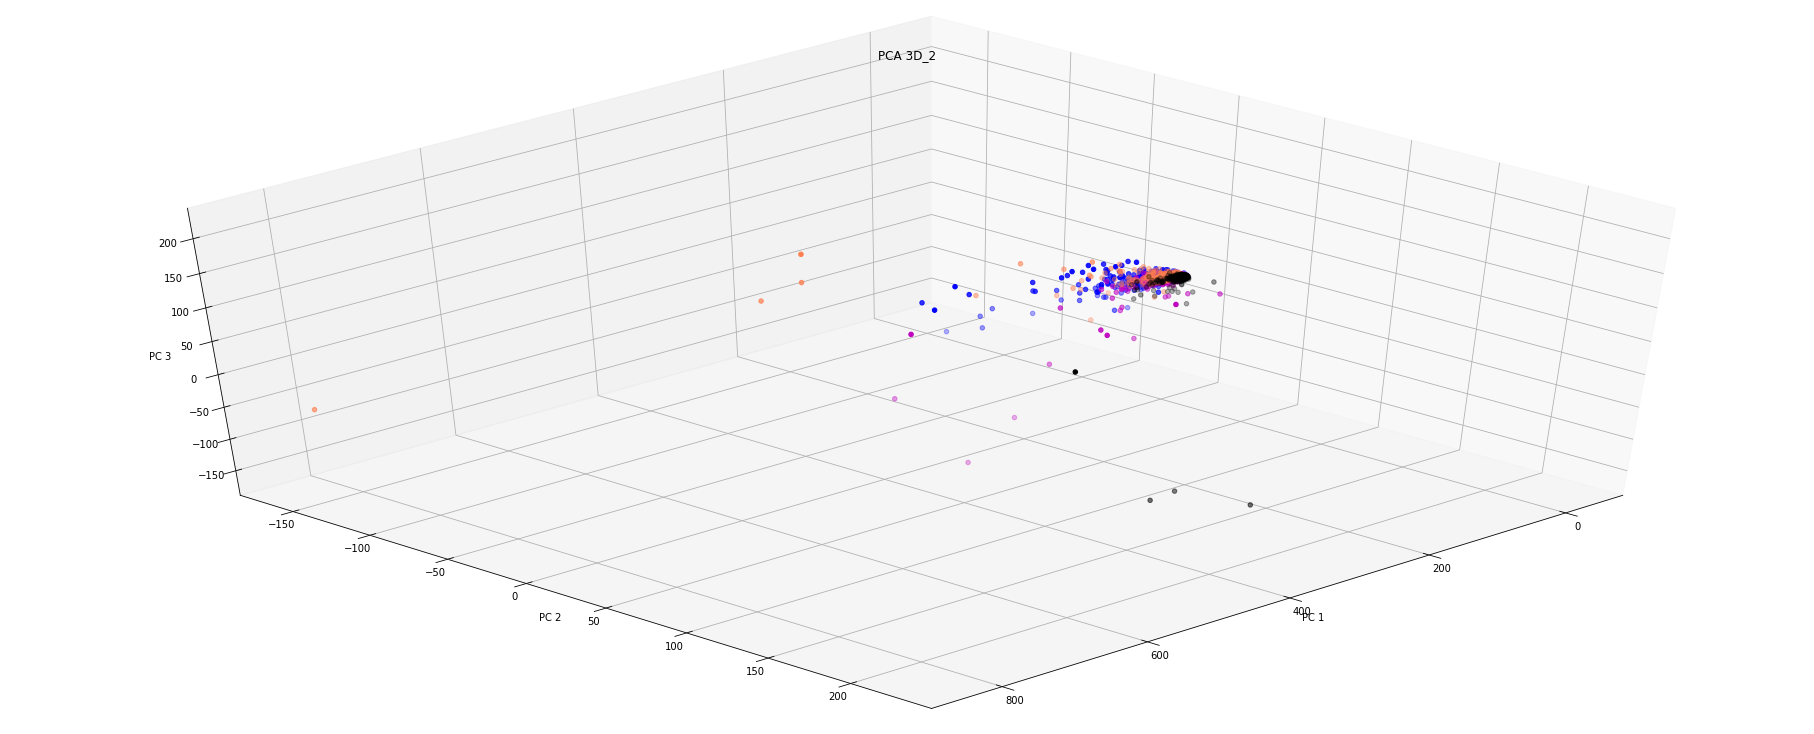

In [46]:
fig = plt.figure(figsize = (25,10))

ax = Axes3D(fig)

for c, category in zip(col, categories):
    xs = X_reduced_3[X['category_name'] == category].T[0]
    ys = X_reduced_3[X['category_name'] == category].T[1]
    zs = X_reduced_3[X['category_name'] == category].T[2]    
    
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

    
ax.set_title('PCA 3D_2')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.view_init(elev=45,azim=45)

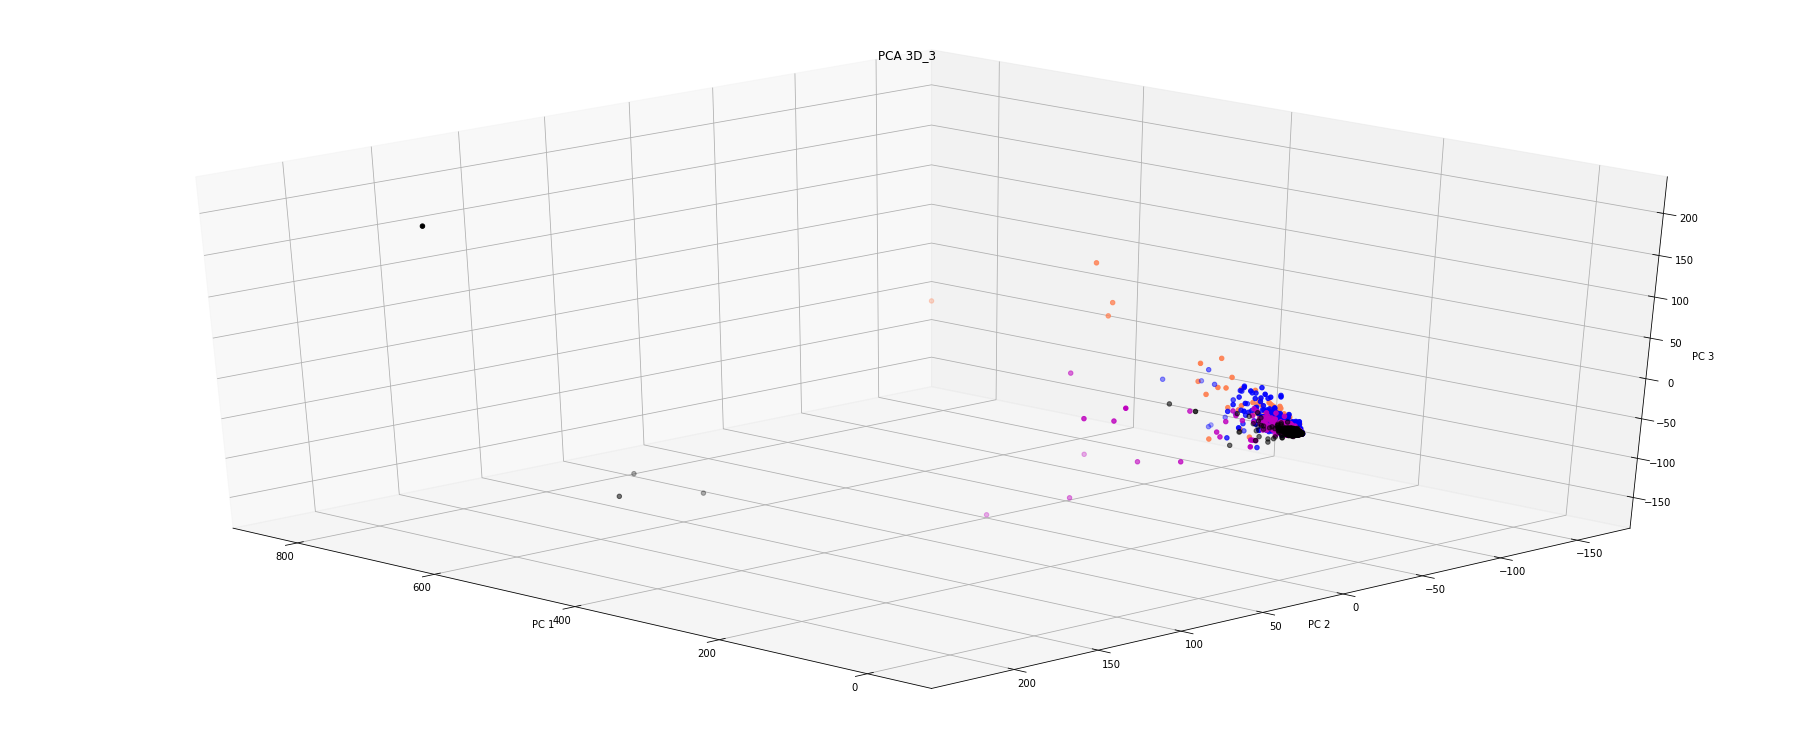

In [47]:
fig = plt.figure(figsize = (25,10))

ax = Axes3D(fig)

for c, category in zip(col, categories):
    xs = X_reduced_3[X['category_name'] == category].T[0]
    ys = X_reduced_3[X['category_name'] == category].T[1]
    zs = X_reduced_3[X['category_name'] == category].T[2]    
    
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

    
ax.set_title('PCA 3D_3')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.view_init(elev=30,azim=135)

---

In [48]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [49]:
term_frequencies[0]

134

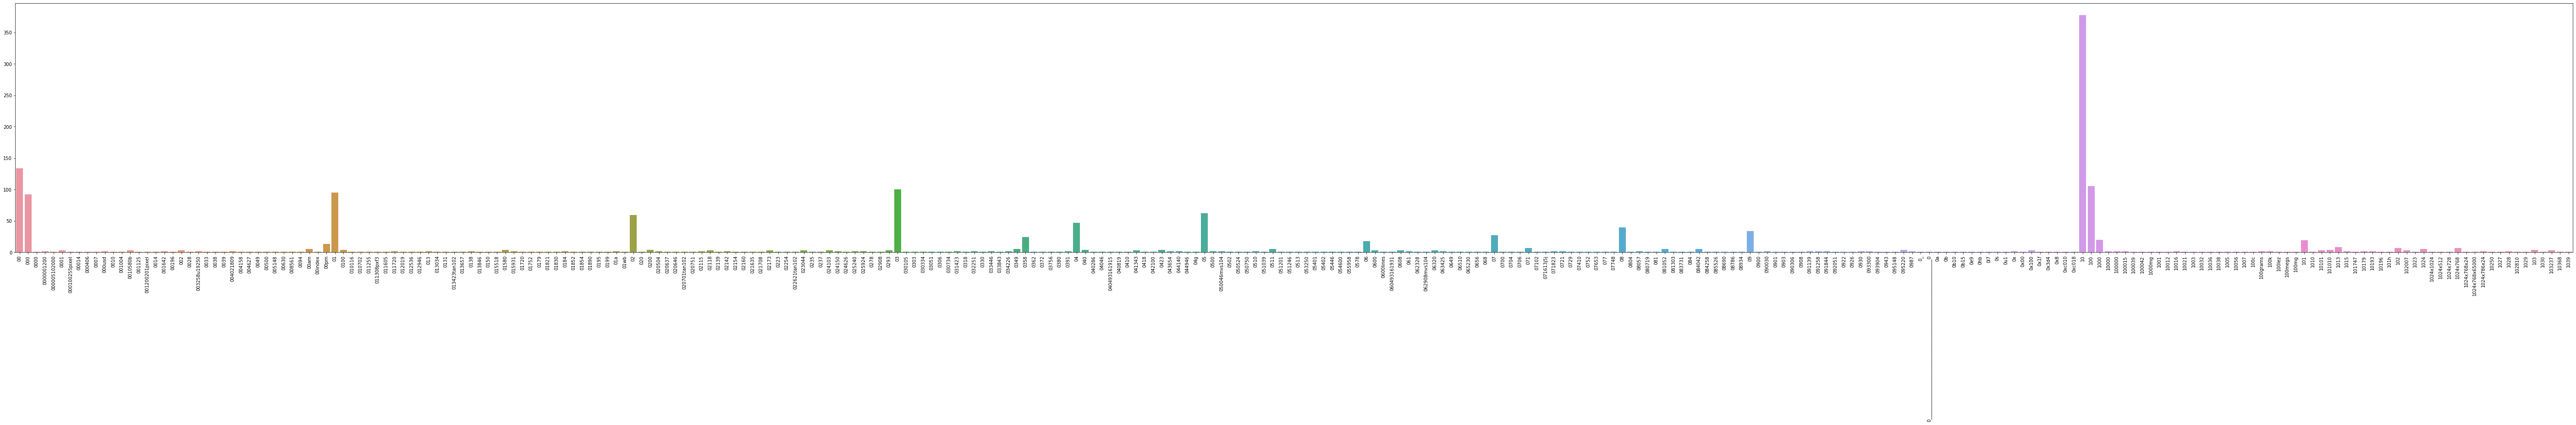

In [50]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

---

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [51]:
# Answer here
import plotly
from plotly import express as px
data = pd.DataFrame({'feature name': count_vect.get_feature_names()[-300:], 'frequencies': term_frequencies[-300:]})

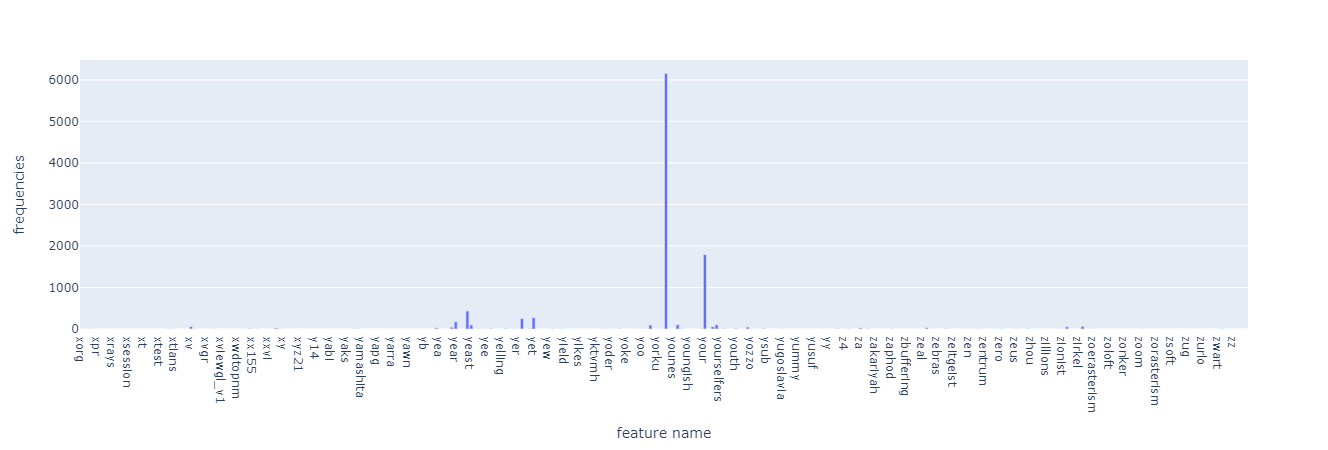

In [52]:
fig = px.bar(data, x='feature name', y='frequencies')
fig.show()

---

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


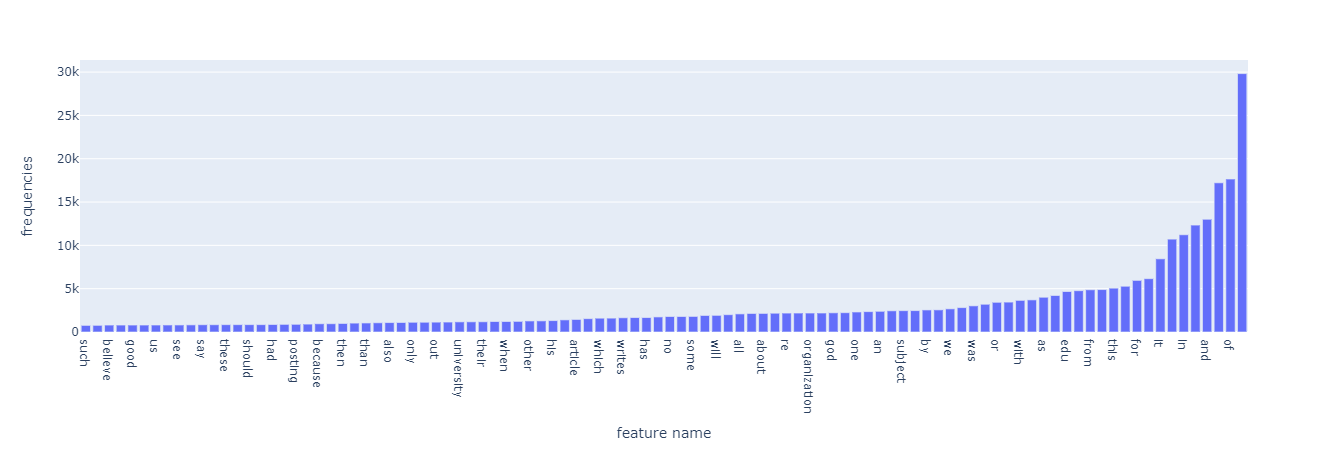

In [53]:
# Answer here
arg_order = np.argsort(np.array(term_frequencies))
length = len(arg_order)
_arg_order = arg_order[-100:] #select highest 100 features
sub_data = {'feature name': np.array(count_vect.get_feature_names())[_arg_order].tolist(), 'frequencies': np.array(term_frequencies)[_arg_order].tolist()}
fig = px.bar(sub_data, x='feature name', y='frequencies')
fig.show()


---

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

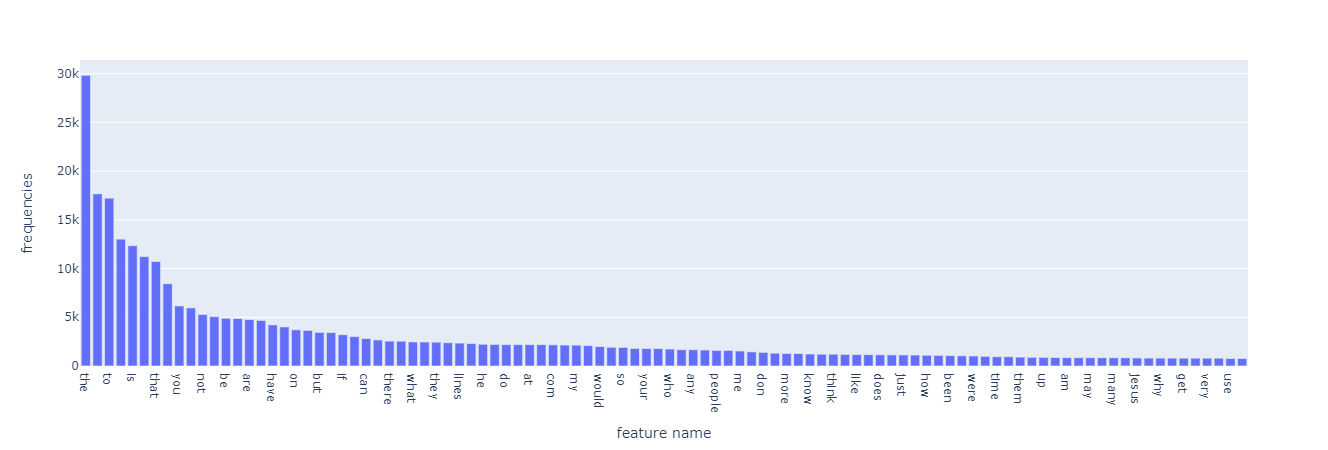

In [54]:
# Answer here
descend_data = {'feature name': np.array(count_vect.get_feature_names())[_arg_order].tolist()[::-1], 'frequencies': np.array(term_frequencies)[_arg_order].tolist()[::-1]}
fig = px.bar(descend_data, x='feature name', y='frequencies')
fig.show()

---

In [55]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [56]:
mlb = preprocessing.LabelBinarizer()

In [57]:
mlb.fit(X.category)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [58]:
X['bin_category'] = mlb.transform(X['category']).tolist()

---

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [59]:
# Answer here
mlb_name = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)


LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [60]:
X['bin_category_by_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   
5  soc.religion.christian  [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...   
6  soc.religion.christian  [From, :, jodfishe, @, silver.ucs.indiana.edu,...   
7                 sci.med  [From, :, aldridge, @, netcom.com, (, Jacqueli...   
8                 sci.med  [From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...   

   bin_category bin_category_by_name  
0  [0, 1, 0, 0]         [0, 1, 0, 0]  
1  [0, 1, 0, 0]         [0, 1, 0, 0]  
2  [0, 0, 0, 1]         [0, 0, 0, 1]  
3  [0, 0, 0, 1]         [0, 0, 0, 1]  
4  [0, 0, 0, 1]         [0, 0, 0, 1]  
5  [0, 0, 0, 1]         [0, 0, 0, 1]  
6  [0, 0, 0, 1]         [0, 0, 0, 1]  
7  [0, 0, 1, 0]         [0, 0, 1, 0]  
8  [0, 0, 1, 0]         [0, 0, 1, 0]

---

# Homework Part

In [61]:
import os
from fnmatch import fnmatch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [62]:
def showConfusionMatrix(y_valid, y_pred):
    confmat = confusion_matrix(y_true=y_valid, y_pred=y_pred)
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.tight_layout()
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(20)
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(15)
    plt.show()

    print('Model Accuracy: %.4f\n' % accuracy_score(y_valid, y_pred))

    print('[Precision]')
    p = precision_score(y_true=y_valid, y_pred=y_pred, average=None)
    print('P[0]: TN / (TN + FN): %.4f' % p[0])
    print('P[1]: TP / (TP + FP): %.4f' % p[1])
    print()

    print('[Recall]')
    r = recall_score(y_true=y_valid, y_pred=y_pred,average=None)
    print('R[0]: TN / (TN + FP): %.4f' % r[0])
    print('R[1]: TP / (TP + FN): %.4f' % r[1])
    print()

    print('[F1-score]')
    f = f1_score(y_true=y_valid, y_pred=y_pred, average=None)
    print('F1[0]: (2 * P[0] * R[0]) / (P[0] + R[0]): %.4f' % f[0])
    print('F1[1]: (2 * P[1] * R[1]) / (P[1] + R[1]): %.4f' % f[1])
    print()
    
    

### Data Preparation

In [63]:
data_folder = './sentiment labelled sentences'

data = []
for filename in os.listdir(data_folder):
    if fnmatch(filename, '*_labelled.txt'):
        with open(os.path.join(data_folder, 'imdb_labelled.txt')) as f:
            lines = f.readlines()
            processed_lines = [line.rstrip().split('\t') for line in lines]
            data.extend(processed_lines)
df = pd.DataFrame(np.array(data), columns=['sentences', 'scores'])
df

sentences scores
0     A very, very, very slow-moving, aimless movie ...      0
1     Not sure who was more lost - the flat characte...      0
2     Attempting artiness with black & white and cle...      0
3          Very little music or anything to speak of.        0
4     The best scene in the movie was when Gerardo i...      1
...                                                 ...    ...
2995  I just got bored watching Jessice Lange take h...      0
2996  Unfortunately, any virtue in this film's produ...      0
2997                   In a word, it is embarrassing.        0
2998                               Exceptionally bad!        0
2999  All in all its an insult to one's intelligence...      0

[3000 rows x 2 columns]

In [64]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

sentences    (The amoung of missing records is: , 0)
scores       (The amoung of missing records is: , 0)
dtype: object

In [65]:
X, y = df.sentences, df.scores
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

### Word Frequency Features

In [66]:
count = CountVectorizer()
X_train_counts = count.fit_transform(X_train)
X_test_counts = count.transform(X_test)

### TF_IDF Features

In [67]:
transformer = TfidfTransformer(smooth_idf=True)
X_train_tfidf = transformer.fit_transform(X_train_counts)
X_test_tfidf = transformer.transform(X_test_counts)

### Data Visualization

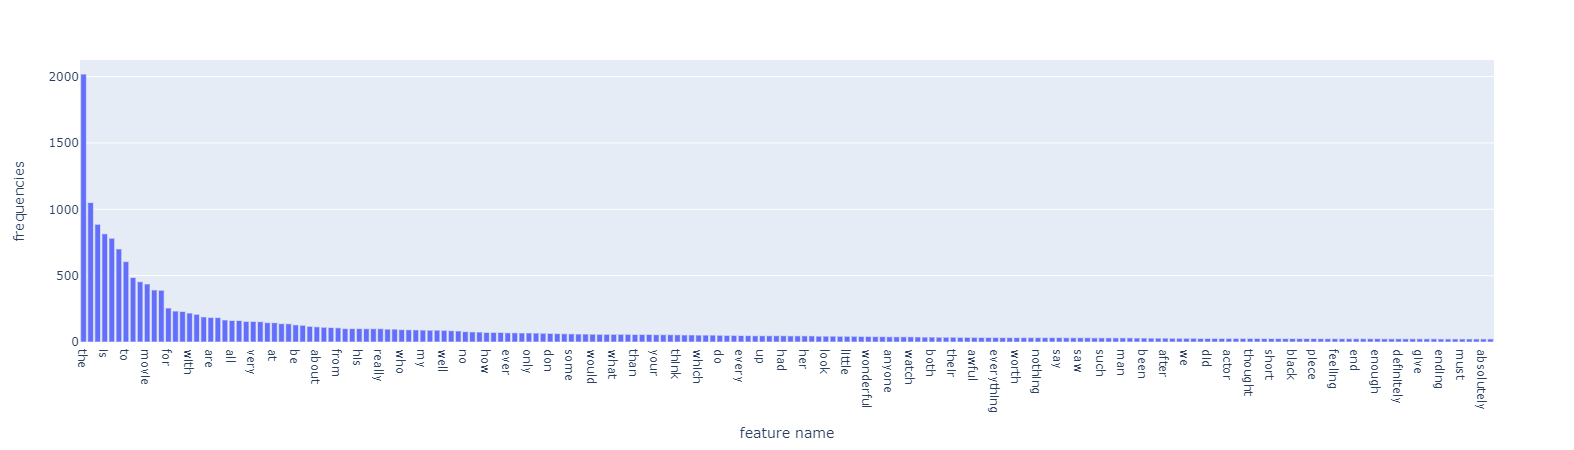

In [68]:
term_frequencies = np.asarray(X_train_counts.sum(axis=0))[0]

arg_order = np.argsort(term_frequencies)
length = len(arg_order)
_arg_order = arg_order[-200:] #select highest 100 features
descend_data = {'feature name': np.array(count.get_feature_names())[_arg_order].tolist()[::-1], 'frequencies': np.array(term_frequencies)[_arg_order].tolist()[::-1]}
fig = px.bar(descend_data, x='feature name', y='frequencies')
fig.show()

### Naive Bayes Classifier with Word Frequency Features

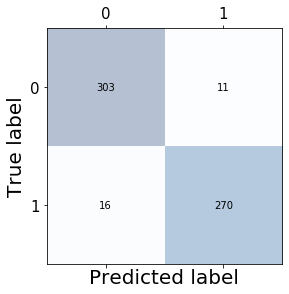

Model Accuracy: 0.9550

[Precision]
P[0]: TN / (TN + FN): 0.9498
P[1]: TP / (TP + FP): 0.9609

[Recall]
R[0]: TN / (TN + FP): 0.9650
R[1]: TP / (TP + FN): 0.9441

[F1-score]
F1[0]: (2 * P[0] * R[0]) / (P[0] + R[0]): 0.9573
F1[1]: (2 * P[1] * R[1]) / (P[1] + R[1]): 0.9524



In [69]:
clf_freq = MultinomialNB()
clf_freq.fit(X_train_counts, y_train)

y_pred = clf_freq.predict(X_test_counts)
# print("Testing accuracy: %.3f" % accuracy_score(y_test, y_pred))
showConfusionMatrix(y_test, y_pred)

### Naive Bayes classifier with TF-IDF Features

Testing accuracy: 0.962


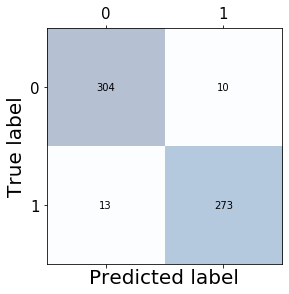

Model Accuracy: 0.9617

[Precision]
P[0]: TN / (TN + FN): 0.9590
P[1]: TP / (TP + FP): 0.9647

[Recall]
R[0]: TN / (TN + FP): 0.9682
R[1]: TP / (TP + FN): 0.9545

[F1-score]
F1[0]: (2 * P[0] * R[0]) / (P[0] + R[0]): 0.9635
F1[1]: (2 * P[1] * R[1]) / (P[1] + R[1]): 0.9596



In [70]:
clf_tfidf = MultinomialNB()
clf_tfidf.fit(X_train_tfidf, y_train)

y_pred = clf_freq.predict(X_test_tfidf)
print("Testing accuracy: %.3f" % accuracy_score(y_test, y_pred))
showConfusionMatrix(y_test, y_pred)

### Discussions

